I got the dataset from: https://www.kaggle.com/pranavraikokte/covid19-image-dataset

# Roadmap

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imrpove the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile
# Unzip our data
zip_ref = zipfile.ZipFile("archive.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
# Walk through 10 classes of food image data
for dirpath, dirname, filenames in os.walk("Covid19-dataset"):
  print("There are " + str(len(dirname)) + " directories and " + str(len(filenames)) + " images in " + dirpath)

There are 2 directories and 0 images in Covid19-dataset
There are 3 directories and 0 images in Covid19-dataset/train
There are 0 directories and 70 images in Covid19-dataset/train/Viral Pneumonia
There are 0 directories and 70 images in Covid19-dataset/train/Normal
There are 0 directories and 111 images in Covid19-dataset/train/Covid
There are 3 directories and 0 images in Covid19-dataset/test
There are 0 directories and 20 images in Covid19-dataset/test/Viral Pneumonia
There are 0 directories and 20 images in Covid19-dataset/test/Normal
There are 0 directories and 26 images in Covid19-dataset/test/Covid


In [ ]:
# Setup the train and test directories
train_dir = "Covid19-dataset/train/"
test_dir = "Covid19-dataset/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['Covid' 'Normal' 'Viral Pneumonia']


In [ ]:
# Visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + "/" + target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False);
  
  print("Image shape: " + str(img.shape))
  return img

Image shape: (925, 1190, 3)


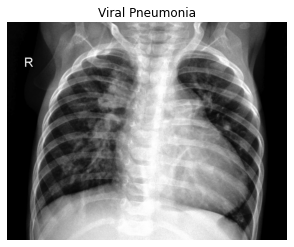

In [ ]:
img = view_random_image(train_dir, random.choice(class_names))

## 2. Preprocess the data

- Create train and test data generator and rescale the data
- Turn it into batches

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


## 3. Create a model (start with a baseline)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create the model
model_1 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

## 4. Fit the model

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
8/8 [==============================] - 13s 2s/step - loss: 1.1253 - accuracy: 0.4343 - val_loss: 1.0488 - val_accuracy: 0.6212
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 0.9866 - accuracy: 0.7131 - val_loss: 0.9337 - val_accuracy: 0.5455
Epoch 3/5
8/8 [==============================] - 12s 1s/step - loss: 0.7572 - accuracy: 0.7331 - val_loss: 0.7216 - val_accuracy: 0.7273
Epoch 4/5
8/8 [==============================] - 12s 2s/step - loss: 0.4559 - accuracy: 0.8446 - val_loss: 0.6179 - val_accuracy: 0.7273
Epoch 5/5
8/8 [==============================] - 12s 1s/step - loss: 0.2760 - accuracy: 0.8884 - val_loss: 0.7681 - val_accuracy: 0.7727


## 5. Evaluate the model

In [ ]:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

In [ ]:
# Evaluate on the test data
model_1.evaluate(test_data)

3/3 [==============================] - 2s 345ms/step - loss: 0.7681 - accuracy: 0.7727


[0.7681336998939514, 0.7727272510528564]

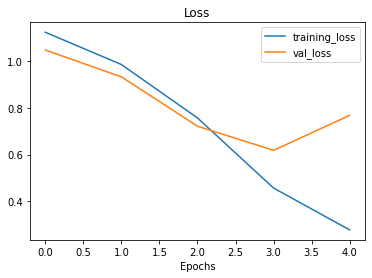

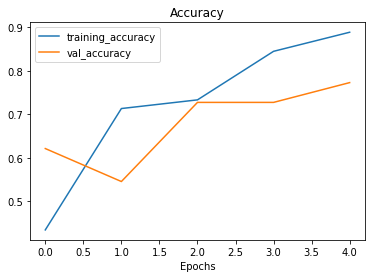

In [ ]:
plot_loss_curves(history_1)

Let's train it for longer and see what happens...

In [ ]:
# Create the model
model_2 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation="softmax")                      
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
8/8 [==============================] - 13s 2s/step - loss: 1.0833 - accuracy: 0.3745 - val_loss: 1.0308 - val_accuracy: 0.4091
Epoch 2/15
8/8 [==============================] - 12s 1s/step - loss: 0.8879 - accuracy: 0.7849 - val_loss: 0.7921 - val_accuracy: 0.6061
Epoch 3/15
8/8 [==============================] - 12s 1s/step - loss: 0.5370 - accuracy: 0.8685 - val_loss: 0.6190 - val_accuracy: 0.6818
Epoch 4/15
8/8 [==============================] - 12s 1s/step - loss: 0.2858 - accuracy: 0.9004 - val_loss: 0.3765 - val_accuracy: 0.8485
Epoch 5/15
8/8 [==============================] - 12s 2s/step - loss: 0.1989 - accuracy: 0.9402 - val_loss: 0.3737 - val_accuracy: 0.8636
Epoch 6/15
8/8 [==============================] - 12s 1s/step - loss: 0.2508 - accuracy: 0.9163 - val_loss: 0.3558 - val_accuracy: 0.8333
Epoch 7/15
8/8 [==============================] - 12s 2s/step - loss: 0.1883 - accuracy: 0.9163 - val_loss: 0.2765 - val_accuracy: 0.8636
Epoch 8/15
8/8 [==================

In [ ]:
model_2.evaluate(test_data)

3/3 [==============================] - 2s 437ms/step - loss: 0.2099 - accuracy: 0.9091


[0.20992709696292877, 0.9090909361839294]

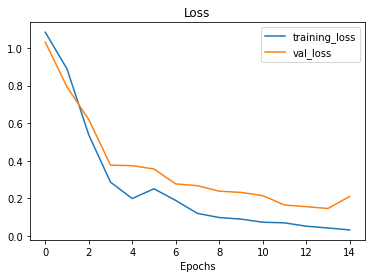

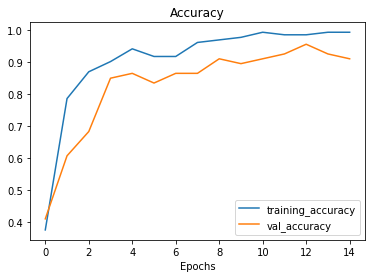

In [ ]:
plot_loss_curves(history_2)

So, training the model for longer definitely helps the model to get better results but after the ~12th epoch it looks like our model starts to overfit.

## 6. Adjust the model hyperparameters

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

In [ ]:
# Import data and augment it from training directory
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 251 images belonging to 3 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # label's aren't augmented. Only data images

Image number: 24


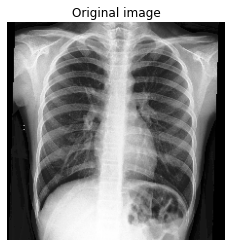

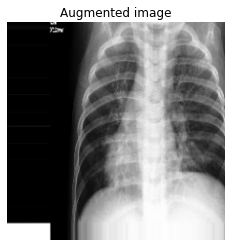

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
print("Image number: " + str(random_number))
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

Let's build a model and see how it learns on augmented data

In [ ]:
import tensorflow as tf

# Create a model (same as model_2)
model_3 = tf.keras.models.clone_model(model_2)

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=17,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/17
8/8 [==============================] - 16s 2s/step - loss: 1.0768 - accuracy: 0.4622 - val_loss: 1.0139 - val_accuracy: 0.3939
Epoch 2/17
8/8 [==============================] - 14s 2s/step - loss: 0.9878 - accuracy: 0.5339 - val_loss: 0.9801 - val_accuracy: 0.4091
Epoch 3/17
8/8 [==============================] - 14s 2s/step - loss: 0.9163 - accuracy: 0.5498 - val_loss: 0.8180 - val_accuracy: 0.7424
Epoch 4/17
8/8 [==============================] - 14s 2s/step - loss: 0.8110 - accuracy: 0.6773 - val_loss: 0.5967 - val_accuracy: 0.7273
Epoch 5/17
8/8 [==============================] - 14s 2s/step - loss: 0.6555 - accuracy: 0.7649 - val_loss: 0.4947 - val_accuracy: 0.7576
Epoch 6/17
8/8 [==============================] - 14s 2s/step - loss: 0.5899 - accuracy: 0.7450 - val_loss: 0.5554 - val_accuracy: 0.6970
Epoch 7/17
8/8 [==============================] - 14s 2s/step - loss: 0.6088 - accuracy: 0.7211 - val_loss: 0.4593 - val_accuracy: 0.7424
Epoch 8/17
8/8 [==================

In [ ]:
model_3.evaluate(test_data)

3/3 [==============================] - 2s 353ms/step - loss: 0.4254 - accuracy: 0.7576


[0.4254329204559326, 0.7575757503509521]

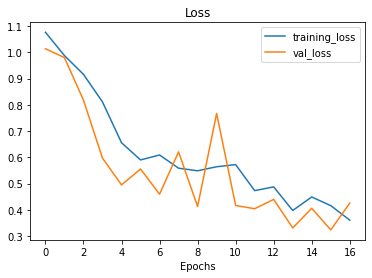

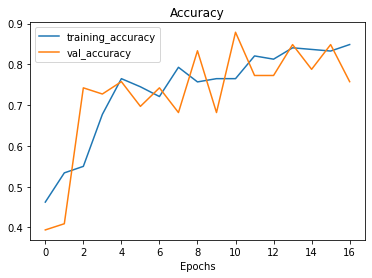

In [ ]:
plot_loss_curves(history_3)

- Looks like something is going wrong

- I think there aren't enough data to train and test on with augmented data. So, I believe that the best thing to do is giving up on data augmentation for now

## 7. Repeat until satisfied

In [ ]:
# Let's try to increase the accuracy of model_2

In [ ]:
model_2.evaluate(test_data)

3/3 [==============================] - 2s 377ms/step - loss: 0.2099 - accuracy: 0.9091


[0.20992709696292877, 0.9090909361839294]

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

Let's add 2 more Conv2D layers and decrease the epochs to balance it, and see if it learns better

In [ ]:
# Create the model
model_4 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation="softmax")
])

# Compile the model
model_4.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 1.0936 - accuracy: 0.5259 - val_loss: 1.0605 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 1.0385 - accuracy: 0.4582 - val_loss: 0.9588 - val_accuracy: 0.5758
Epoch 3/10
8/8 [==============================] - 12s 2s/step - loss: 0.8525 - accuracy: 0.8725 - val_loss: 0.7457 - val_accuracy: 0.7576
Epoch 4/10
8/8 [==============================] - 12s 2s/step - loss: 0.5001 - accuracy: 0.8845 - val_loss: 0.5078 - val_accuracy: 0.7576
Epoch 5/10
8/8 [==============================] - 12s 2s/step - loss: 0.3497 - accuracy: 0.8685 - val_loss: 0.4582 - val_accuracy: 0.7727
Epoch 6/10
8/8 [==============================] - 12s 2s/step - loss: 0.2361 - accuracy: 0.9163 - val_loss: 0.4870 - val_accuracy: 0.8182
Epoch 7/10
8/8 [==============================] - 12s 1s/step - loss: 0.2180 - accuracy: 0.9163 - val_loss: 0.5465 - val_accuracy: 0.6970
Epoch 8/10
8/8 [==================

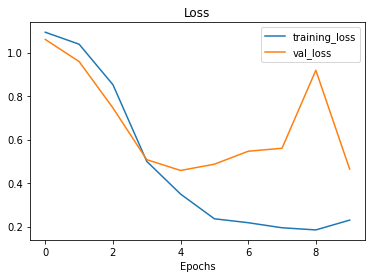

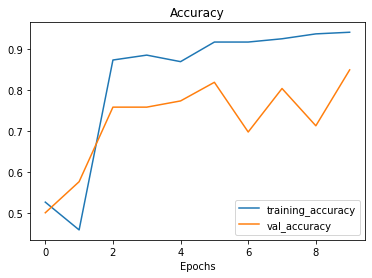

In [ ]:
plot_loss_curves(history_4)

Looks like it is overfitting. Let's change the kernel size in model_2 and see what happens.

In [ ]:
# Create the model
model_5 = Sequential([
  Conv2D(10, 2, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 2, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 2, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation="softmax")                      
])

# Compile the model
model_5.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 0.9611 - accuracy: 0.5697 - val_loss: 0.8382 - val_accuracy: 0.5909
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 0.6009 - accuracy: 0.7968 - val_loss: 0.6395 - val_accuracy: 0.7727
Epoch 3/10
8/8 [==============================] - 12s 1s/step - loss: 0.3432 - accuracy: 0.8884 - val_loss: 0.5093 - val_accuracy: 0.6970
Epoch 4/10
8/8 [==============================] - 12s 1s/step - loss: 0.2342 - accuracy: 0.9163 - val_loss: 0.4558 - val_accuracy: 0.7576
Epoch 5/10
8/8 [==============================] - 12s 1s/step - loss: 0.1896 - accuracy: 0.9363 - val_loss: 0.3948 - val_accuracy: 0.8485
Epoch 6/10
8/8 [==============================] - 12s 1s/step - loss: 0.1594 - accuracy: 0.9363 - val_loss: 0.3793 - val_accuracy: 0.8182
Epoch 7/10
8/8 [==============================] - 12s 1s/step - loss: 0.1150 - accuracy: 0.9641 - val_loss: 0.3736 - val_accuracy: 0.8788
Epoch 8/10
8/8 [==================

In [ ]:
model_5.evaluate(test_data)

3/3 [==============================] - 2s 408ms/step - loss: 0.2618 - accuracy: 0.9091


[0.2617795169353485, 0.9090909361839294]

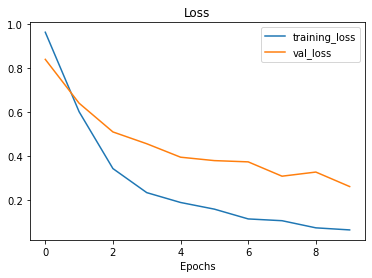

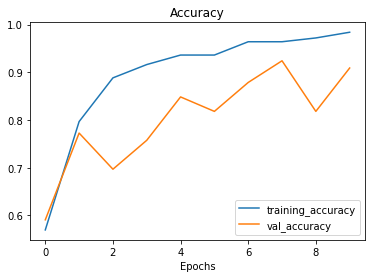

In [ ]:
plot_loss_curves(history_5)

Let's try for one last time..

In [80]:
# Create the model
model_6 = Sequential([
  Conv2D(10, 2, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 2, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation="softmax")                      
])

# Compile the model
model_6.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data,
                        epochs=12,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/12
8/8 [==============================] - 13s 2s/step - loss: 1.0887 - accuracy: 0.5578 - val_loss: 0.7573 - val_accuracy: 0.6515
Epoch 2/12
8/8 [==============================] - 12s 1s/step - loss: 0.4564 - accuracy: 0.8964 - val_loss: 0.5233 - val_accuracy: 0.7727
Epoch 3/12
8/8 [==============================] - 12s 1s/step - loss: 0.2708 - accuracy: 0.9283 - val_loss: 0.4653 - val_accuracy: 0.8030
Epoch 4/12
8/8 [==============================] - 12s 1s/step - loss: 0.2067 - accuracy: 0.9243 - val_loss: 0.4097 - val_accuracy: 0.8485
Epoch 5/12
8/8 [==============================] - 12s 2s/step - loss: 0.1515 - accuracy: 0.9442 - val_loss: 0.3664 - val_accuracy: 0.8636
Epoch 6/12
8/8 [==============================] - 12s 1s/step - loss: 0.1259 - accuracy: 0.9602 - val_loss: 0.3705 - val_accuracy: 0.8636
Epoch 7/12
8/8 [==============================] - 12s 2s/step - loss: 0.1052 - accuracy: 0.9681 - val_loss: 0.3123 - val_accuracy: 0.8788
Epoch 8/12
8/8 [==================

In [81]:
model_6.evaluate(test_data)

3/3 [==============================] - 1s 341ms/step - loss: 0.2421 - accuracy: 0.9242


[0.24210070073604584, 0.9242424368858337]

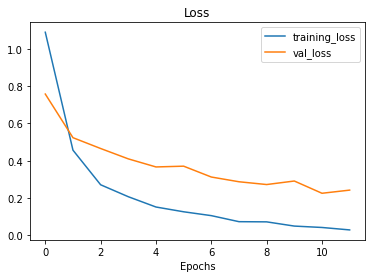

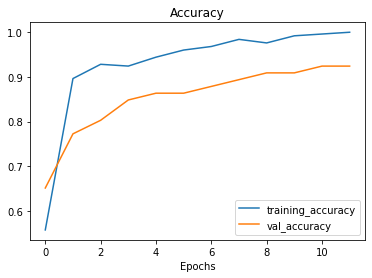

In [82]:
plot_loss_curves(history_6)

# Making a prediction with our training model on our own custom data

(242, 209, 3)


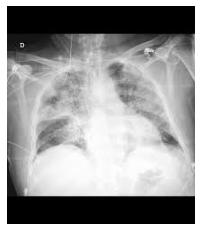

In [ ]:
img = mpimg.imread("test_2.jpg")
plt.imshow(img)
plt.axis(False);
print(img.shape)

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values btw. 0 and 1)
  img=img/255.0
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round


  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

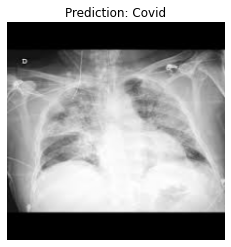

In [ ]:
# Make a prediction using model_6
pred_and_plot(model_6, "test_2.jpg", class_names)

(225, 225, 3)


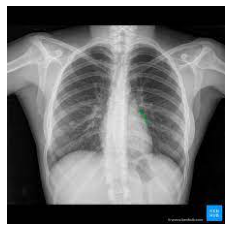

In [ ]:
img = mpimg.imread("healthy.jpg")
plt.imshow(img)
plt.axis(False);
print(img.shape)

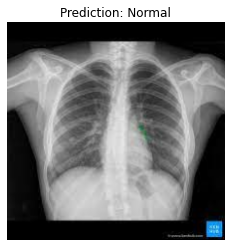

In [ ]:
pred_and_plot(model_6, "healthy.jpg", class_names)

(194, 260, 3)


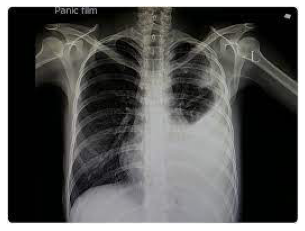

In [ ]:
img = mpimg.imread("viral_pneumonia.jpg")
plt.imshow(img)
plt.axis(False);
print(img.shape)

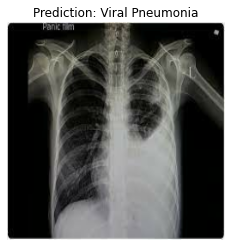

In [ ]:
pred_and_plot(model_6, "viral_pneumonia.jpg", class_names)

In [84]:
model_6.save("predict_covid_normal_pneumonia_model_6")

INFO:tensorflow:Assets written to: predict_covid_normal_pneumonia_model_6/assets
